In [1]:
# Import libraries
import numpy as np
import pandas as pd
import random as rd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import statistics as st
from math import sqrt

In [2]:
pd.set_option("display.max.columns", None) # Show the values of all rows and columns
pd.set_option("display.max.row", None)
pd.set_option("display.precision", 4)

In [3]:
data = pd.read_excel('Dataset-Daphniamagna.xlsx')
data # Dependent value - Acute Toxicity Class [Observed]

,ID,CAS No.,Chemical Name,Set*,Acute Toxicity Class [Observed],MLOGP,η,Me,Ad,nBT,Hy
0,ID-39,79947,"2,2',6,6'-tetrabromo-4,4'-isopropylidenediphenol",T,Highly toxic,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,ID-44,80513,"4,4'-Oxybis(benzenesulfonylhydrazide)",T,Highly toxic,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,ID-49,84695,Diisobutyl phthalate,T,Highly toxic,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,ID-50,84742,Dibutyl phthalate,T,Highly toxic,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,ID-67,88857,"Phenol, 2-(1-methylpropyl)-4,6-dinitro-",T,Highly toxic,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,ID-98,93834,"N,N-Bis(2-hydroxyethyl)oleamide",T,Highly toxic,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,ID-163,101020,Triphenyl phosphite,T,Highly toxic,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,ID-165,101202,"1-(4-Chlorophenyl)-3-(3,4-dichlorophenyl)urea",T,Highly toxic,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,ID-247,115322,Kelthane,T,Highly toxic,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,ID-248,115866,Triphenyl phosphate,T,Highly toxic,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [4]:
# Selection of the most important columns for statistical analysis - only indepepndent variables
dataset_for_statistical_analysis = data.drop(columns=['ID', 'CAS No.', 'Chemical Name', 'Set*', 'Acute Toxicity Class [Observed]'])

In [5]:
dataset_for_statistical_analysis # Show the finished collection

,MLOGP,η,Me,Ad,nBT,Hy
0,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [6]:
dataset_for_statistical_analysis

,MLOGP,η,Me,Ad,nBT,Hy
0,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [7]:
dataset_for_statistical_analysis.describe() # Show descriptive statistics for a set

,MLOGP,η,Me,Ad,nBT,Hy
count,495.0000,495.0000,495.0000,495.0000,495.0000,495.0000
mean,2.3515,4.7422,1.0070,19.6592,24.0586,-0.0565
std,1.6258,0.7189,0.0429,8.9939,12.9918,1.1598
min,-3.9260,2.7955,0.9597,4.6344,3.0000,-0.9858
25%,1.2515,4.2660,0.9784,13.7227,15.0000,-0.7814
50%,2.3908,4.5685,0.9938,17.3587,21.0000,-0.4288
75%,3.4904,5.1418,1.0216,24.5486,30.0000,0.1579
max,7.2283,7.4525,1.2700,62.4600,87.0000,6.9920


In [8]:
# Create a correlation matrix (DataFrame)
corr_data = dataset_for_statistical_analysis.corr().round(2)
corr_data

,MLOGP,η,Me,Ad,nBT,Hy
MLOGP,1.00,-0.08,-0.23,0.63,0.54,-0.48
η,-0.08,1.00,-0.11,-0.23,0.03,-0.09
Me,-0.23,-0.11,1.00,-0.24,-0.42,0.15
Ad,0.63,-0.23,-0.24,1.00,0.91,-0.19
nBT,0.54,0.03,-0.42,0.91,1.00,-0.17
Hy,-0.48,-0.09,0.15,-0.19,-0.17,1.00


<AxesSubplot:>

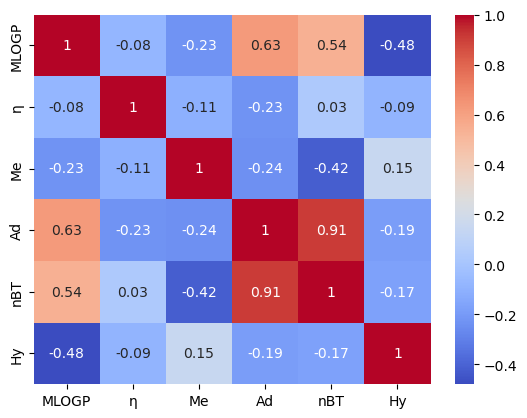

In [9]:
# Create a correlation matrix (Heatmap)
sb.heatmap(corr_data, cmap="coolwarm", annot=True)

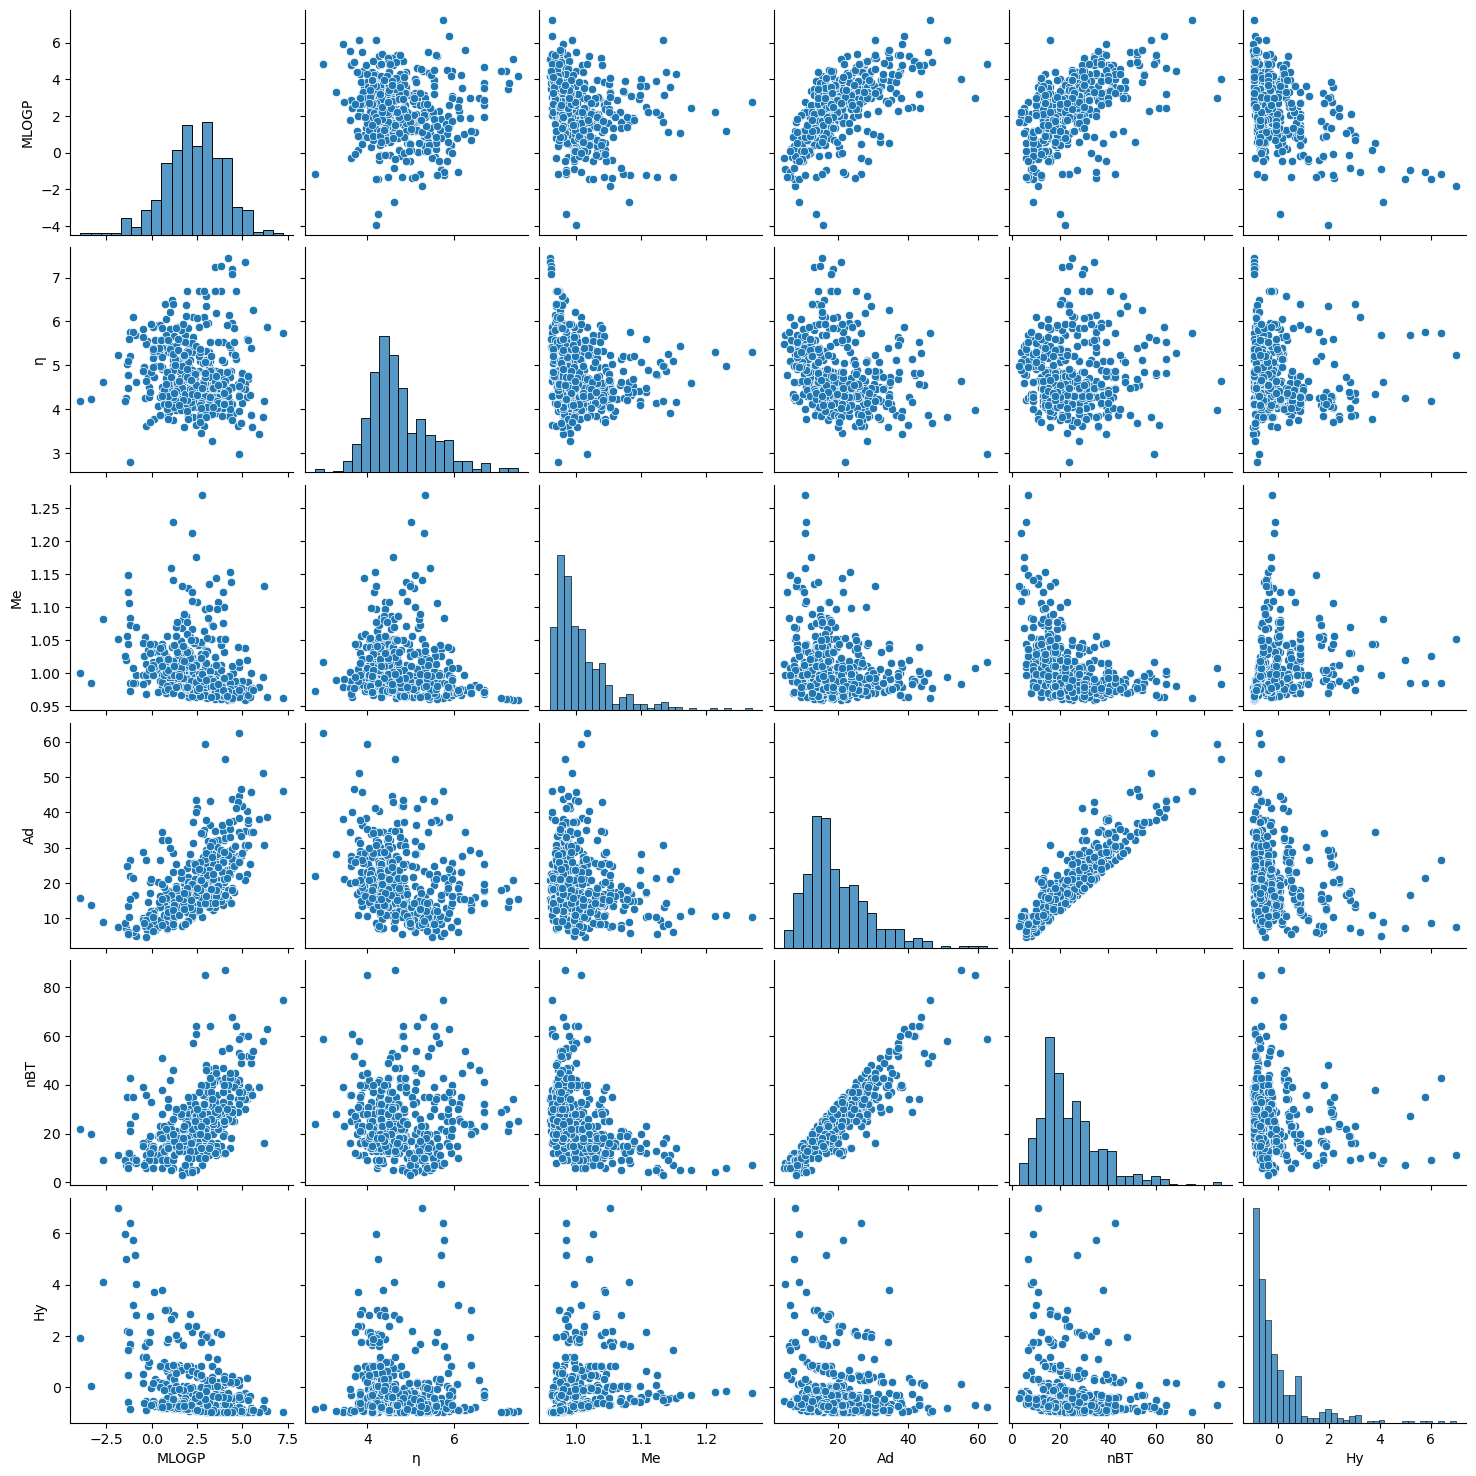

In [10]:
sns.pairplot(dataset_for_statistical_analysis)

array([[<AxesSubplot:title={'center':'MLOGP'}>,
        <AxesSubplot:title={'center':'η'}>],
       [<AxesSubplot:title={'center':'Me'}>,
        <AxesSubplot:title={'center':'Ad'}>],
       [<AxesSubplot:title={'center':'nBT'}>,
        <AxesSubplot:title={'center':'Hy'}>]], dtype=object)

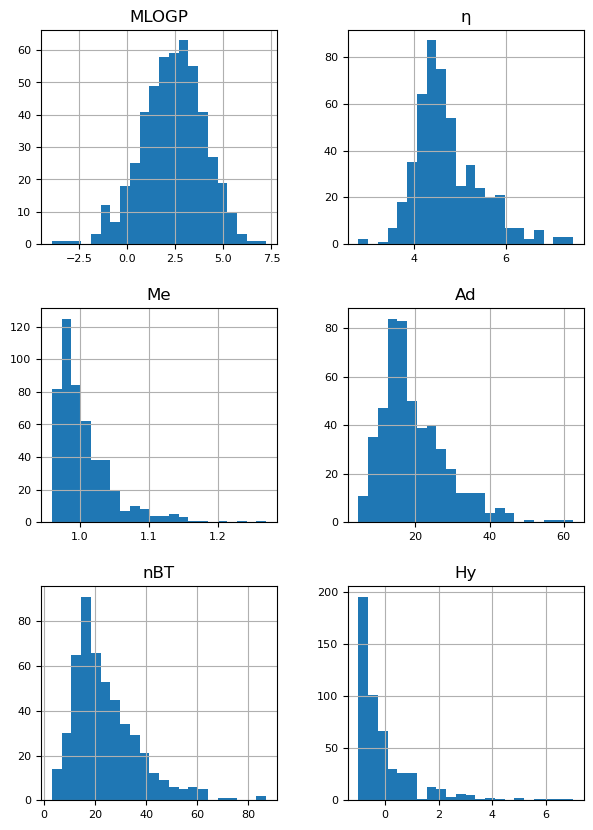

In [11]:
# Create histograms for independent variables
dataset_for_statistical_analysis.hist(figsize=(7, 10), bins=22, xlabelsize=8, ylabelsize=8) 

In [12]:
# Calculate of kurtosis and skewness
kurtosis_skew = dataset_for_statistical_analysis.agg(['kurtosis', 'skew']).round(3)
kurtosis_skew

,MLOGP,η,Me,Ad,nBT,Hy
kurtosis,0.382,1.238,6.337,2.132,2.639,8.941
skew,-0.311,0.983,2.124,1.246,1.357,2.626


In [13]:
dataset_with_ATC = data.drop(columns=['ID', 'CAS No.', 'Chemical Name', 'Set*']) # Selection of the most important columns for boxplots - set with dependent variable
dataset_with_ATC = dataset_with_ATC.rename(columns={'Acute Toxicity Class [Observed]': 'Rzeczywista klasa toksyczności'}) # Change the name of the dependent variable (Acute Toxicity Class [Observed]) from English to Polish
dataset_with_ATC['Rzeczywista klasa toksyczności'].replace(['Highly toxic', 'Low to non-toxic'], ['Wysoce toksyczne', 'Nisko toksyczne do nietoksycznych'], inplace=True) # From English to Polish

In [14]:
dataset_with_ATC

,Rzeczywista klasa toksyczności,MLOGP,η,Me,Ad,nBT,Hy
0,Wysoce toksyczne,5.2547,4.2730,1.0194,40.3316,34,0.3778
1,Wysoce toksyczne,0.5416,4.3525,1.0436,34.4918,38,3.7945
2,Wysoce toksyczne,3.6180,4.7875,1.0007,30.6613,42,-0.7872
3,Wysoce toksyczne,3.6180,4.7445,1.0007,30.8098,42,-0.7872
4,Wysoce toksyczne,2.7021,4.3735,1.0434,23.1032,29,-0.0829
5,Wysoce toksyczne,4.4314,5.2795,0.9803,43.6258,68,0.1750
6,Wysoce toksyczne,4.4532,3.8990,1.0007,37.5793,39,-0.8066
7,Wysoce toksyczne,3.9875,4.1965,1.0329,32.2564,29,0.4449
8,Wysoce toksyczne,5.1490,4.5430,1.0390,34.6314,30,-0.2221
9,Wysoce toksyczne,4.7894,3.9710,1.0093,38.3931,40,-0.7721


In [15]:
dataset_with_ATC.columns

Index(['Rzeczywista klasa toksyczności', 'MLOGP', 'η', 'Me', 'Ad', 'nBT',
       'Hy'],
      dtype='object')

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='MLOGP'>

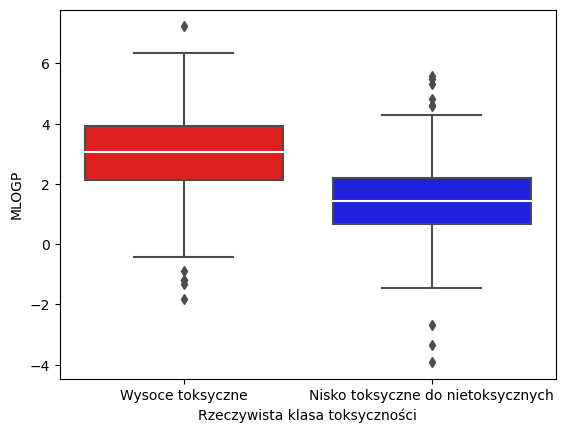

In [16]:
# Create six boxplots
sns.boxplot(x='Rzeczywista klasa toksyczności', y='MLOGP', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='η'>

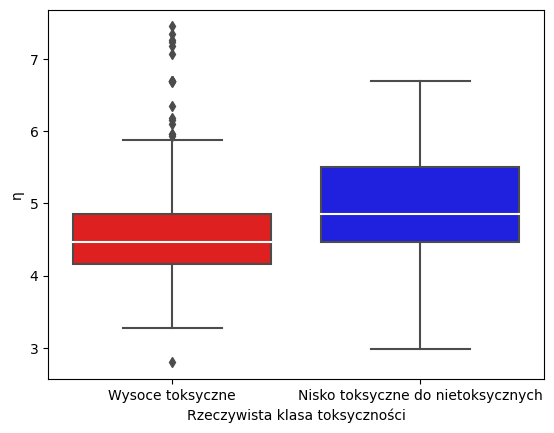

In [17]:
sns.boxplot(x='Rzeczywista klasa toksyczności', y='η', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='Me'>

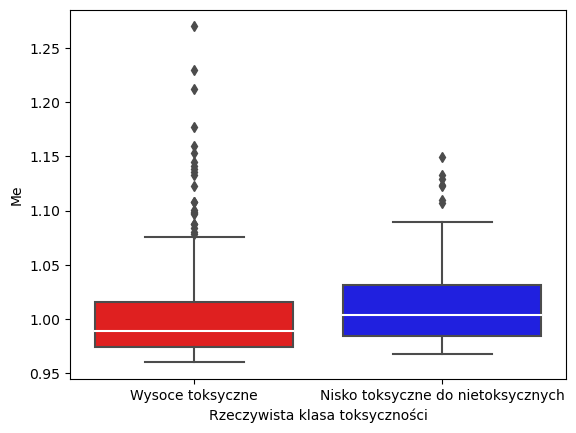

In [18]:
sns.boxplot(x='Rzeczywista klasa toksyczności', y='Me', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='Ad'>

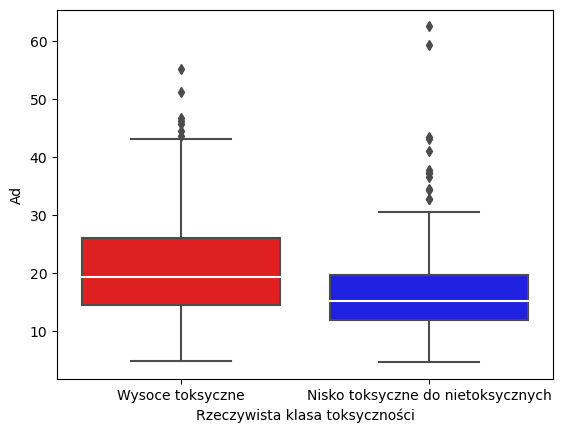

In [19]:
sns.boxplot(x='Rzeczywista klasa toksyczności', y='Ad', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='nBT'>

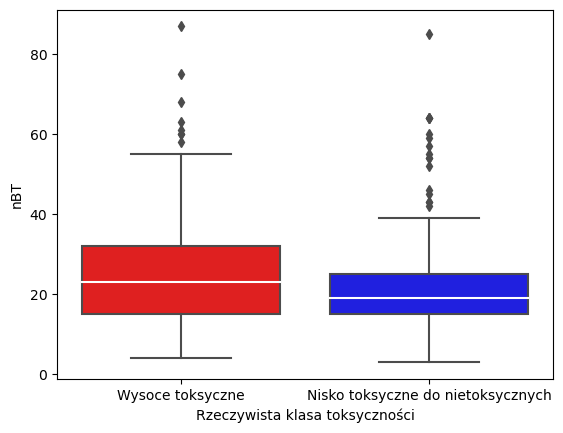

In [20]:
sns.boxplot(x='Rzeczywista klasa toksyczności', y='nBT', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

<AxesSubplot:xlabel='Rzeczywista klasa toksyczności', ylabel='Hy'>

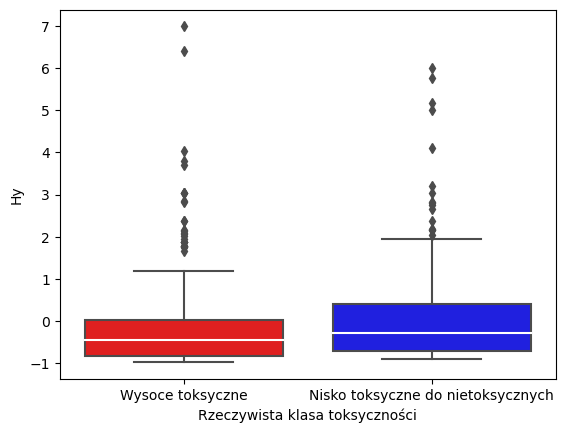

In [21]:
sns.boxplot(x='Rzeczywista klasa toksyczności', y='Hy', data=dataset_with_ATC, palette=['red', 'blue'], medianprops={'color': 'white'})

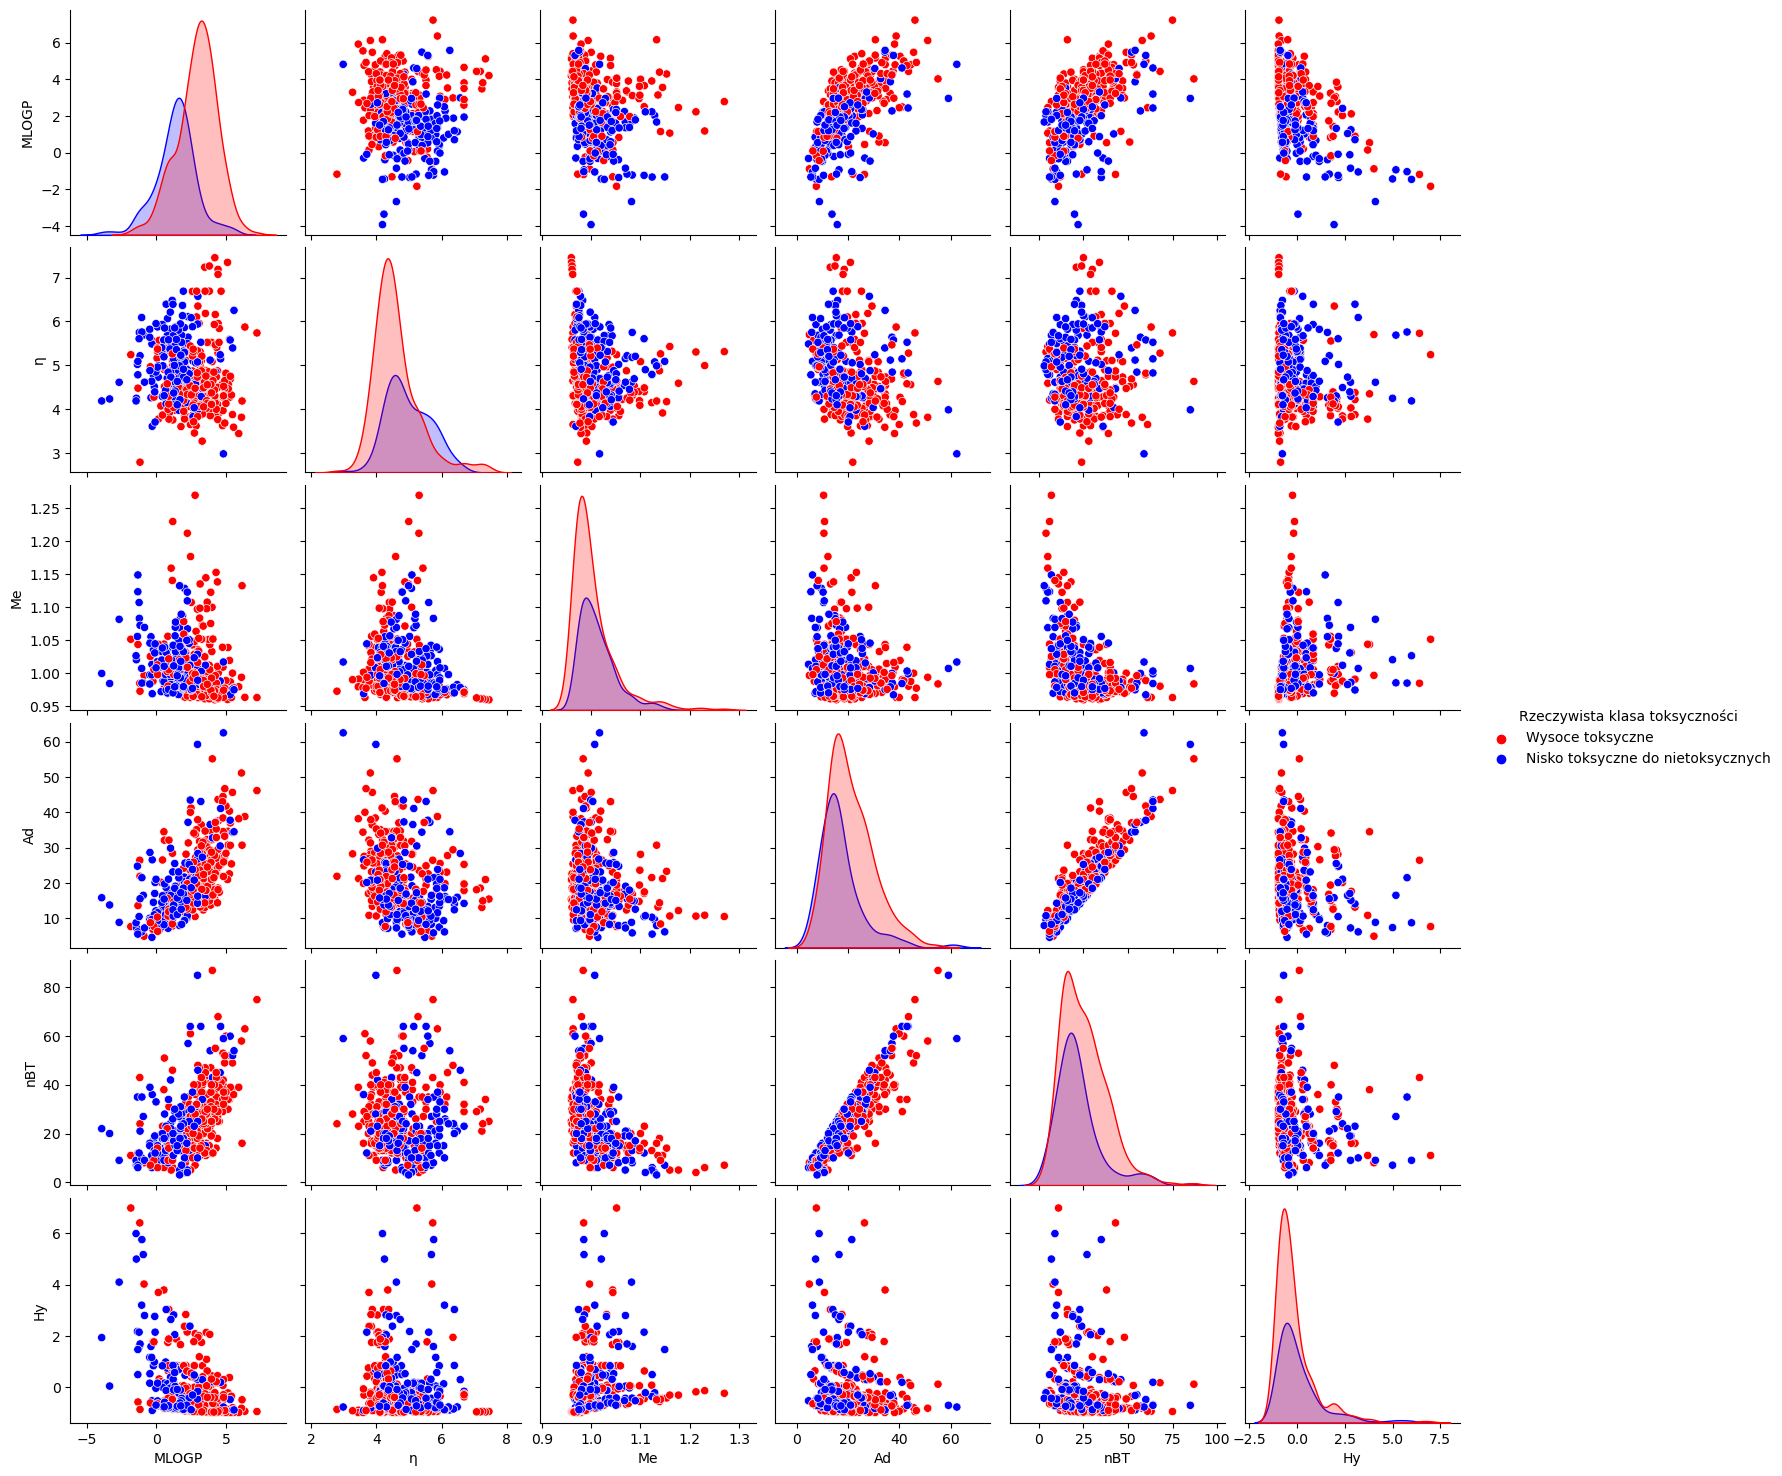

In [22]:
# Show the distribution of the set
sns.pairplot(dataset_with_ATC, hue='Rzeczywista klasa toksyczności', palette=['red', 'blue'])